<a href="https://colab.research.google.com/github/ju-resplande/projeto_nlp/blob/main/Dados_REC_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtendo Dataset

In [1]:
!pip install datasets ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from datasets import load_dataset
import missingno as msno
from ydata_profiling import ProfileReport
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import random

In [3]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

In [4]:
data = load_dataset("ruanchaves/b2w-reviews01")

  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
print(data.keys())

dict_keys(['train'])


In [6]:
df = data['train'].to_pandas()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int32  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int32(1), object(12)


In [8]:
#Dimensões
print("Nº de colunas: ", len(df.columns))
print("Nº de Linhas: ", len(df.axes[0]))

Nº de colunas:  14
Nº de Linhas:  132373


In [9]:
#Informação
print("Nome das colunas: ")
for i in df.columns:
  print(i)

Nome das colunas: 
submission_date
reviewer_id
product_id
product_name
product_brand
site_category_lv1
site_category_lv2
review_title
overall_rating
recommend_to_a_friend
review_text
reviewer_birth_year
reviewer_gender
reviewer_state


## Breve Explicação sobre o dataset:

Este dataset "b2w-reviews01" é um conjunto de avaliações de produtos da **B2W (Americanas)**, uma empresa de comércio eletrônico na América Latina.

- "**submission_date**": Data em que a avaliação foi submetida;
- "**reviewer_id**": Id da avaliação;
- "**product_id**": Id do produto;
- "**product_name**": Nome do produto avaliado;
- "**product_brand**": Marca do produto;
- "**site_category_lv1**": Categoria do produto nível 1 (mais genérico) dentro do site da Americanas;
- "**site_category_lv2**": Categoria do produto nível 2 (mais específico) dentro do site da Americanas;
- "**review_title**": Título da avaliação;
- "**overall_rating**": Classificação dada pelo avaliador, com uma escala de 1 a 5 estrelas;
- "**recommend_to_a_friend**": Se o Avaliador recomendaria pra um amigo (sim ou não)
- "**review_text**": Texto/corpo da avaliação;
-  "**reviewer_birth_year**": Ano de nascimento do avaliador;
- "**reviewer_gender**": Gênero ao qual o avaliador se identifica;
- "**reviewer_state**": Estado onde o avaliador reside.


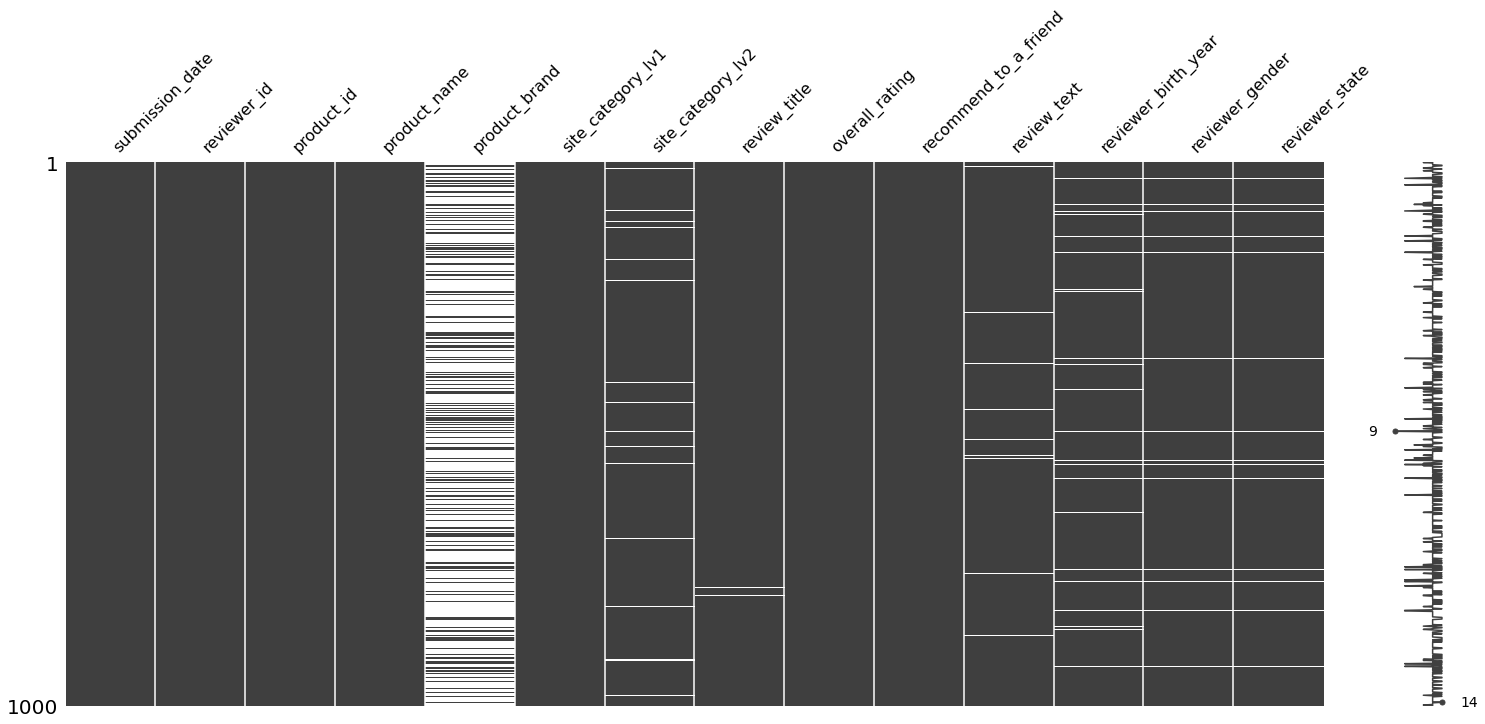

In [10]:
#Visão de um sample de 1000 linhas, sobre o quanto de dados estão faltando
msno.matrix(df.sample(1000))

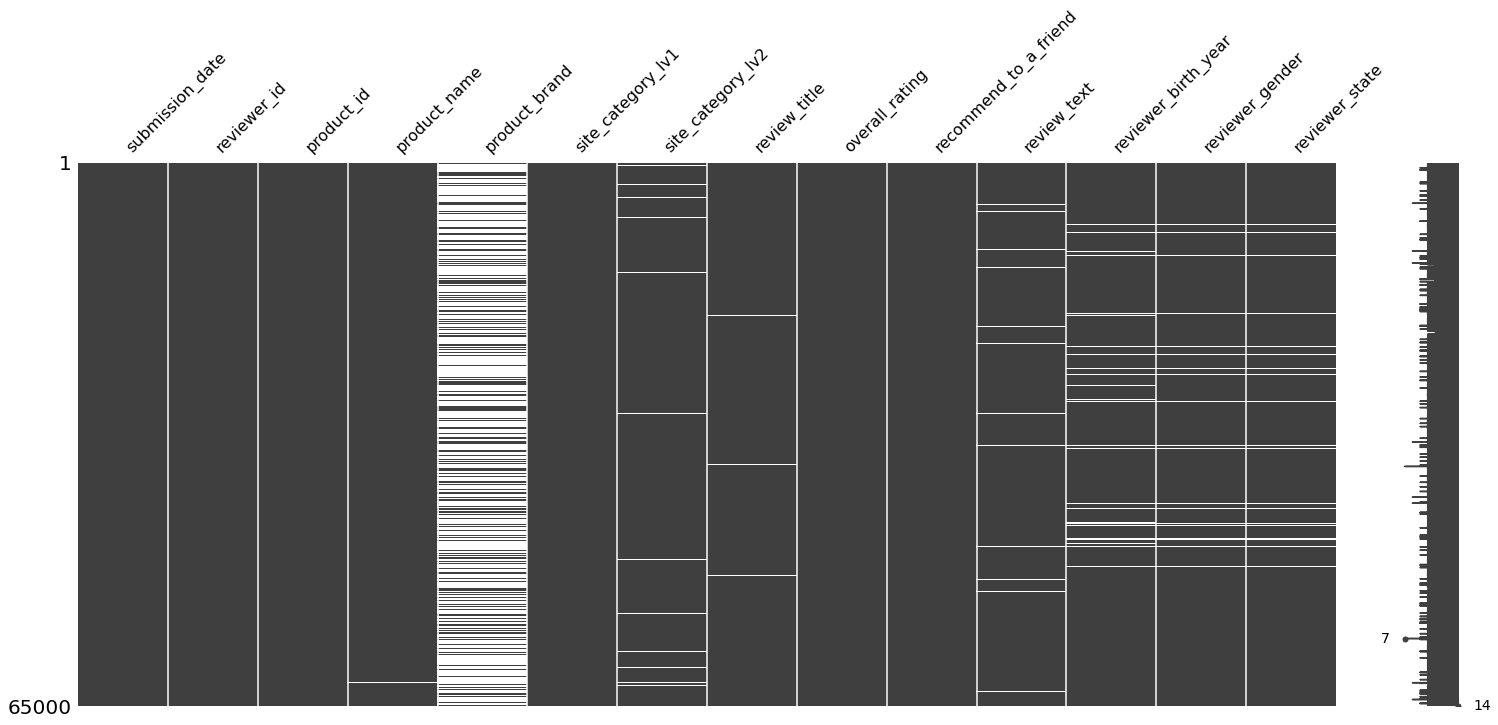

In [11]:
#Visão de um sample de 65000 linhas (50%), sobre o quanto de dados estão faltando
msno.matrix(df.sample(65000))

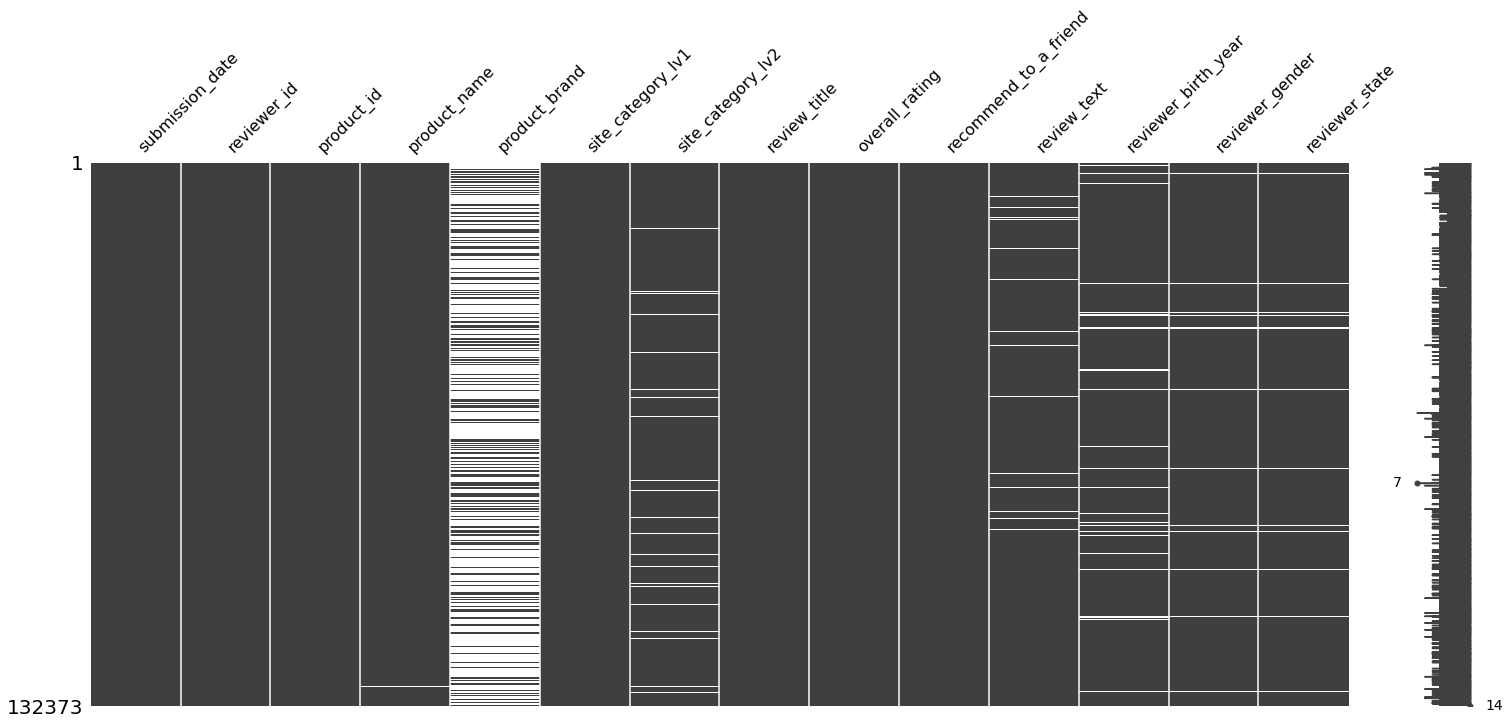

In [12]:
#Visão de um sample de 132327 linhas (100%), sobre o quanto de dados estão faltando
msno.matrix(df)

In [13]:
#ProfileReport(df)

## Tratamento Geral dos Dados


### Excluindo as avaliações de valor 3 (rating = 3)

In [14]:
#df= df[df['overall_rating'] != 3]

In [15]:
df['overall_rating'].value_counts()

5    47955
4    32345
1    27369
3    16315
2     8389
Name: overall_rating, dtype: int64

### Junção da Coluna de Título + Corpo da Reviewer

In [16]:
df['review'] = df['review_title'] + '\n' + df['review_text']

### Criação da coluna Tamanho da Avaliação (com base apenas no corpo da Avaliação)

In [17]:
tamanhos=[]
for i in df['review_text']:
  if i is None:
    tamanhos.append(0)
  else:
    tamanhos.append(len(i))


In [18]:
df['len_review_text'] = tamanhos

In [19]:
df.sort_values(by="len_review_text",ascending=True)

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,review,len_review_text
126053,2018-05-22 18:13:14,6acf256aaa518971fbf0c4da059102b795607264b5b651...,14262532,Celular Ipro I3200 Dual Chip Desbloqueado Pret...,None,Celulares e Smartphones,Celular,"nem recedbi o produto, como posso avaliar algo...",1,No,None,1982.0,F,RJ,NaN,0
56089,2018-03-11 14:32:48,cd497c213cb14992a09a76c5408ad6ea56bfba9ebd9d77...,27780410,Funko Pop! Deadpool - Marvel,None,Brinquedos,Bonecos,compra total,4,Yes,None,NaN,M,SP,NaN,0
56092,2018-03-11 14:41:20,cd497c213cb14992a09a76c5408ad6ea56bfba9ebd9d77...,10520202,Spider-Man / Homem-Aranha - Funko Pop Marvel,None,Brinquedos,Bonecos,storegamers,4,Yes,None,NaN,M,SP,NaN,0
87175,2018-04-11 21:32:23,84f9ef7bdd0db1e3779818830a82239a7b8ba749c86891...,25307454,Painel Gama Branco Brilho,None,Móveis,"Rack, Estante e Painel",Ruim,1,No,None,1964.0,F,SP,NaN,0
25423,2018-01-20 07:09:28,0d91ee4af408eaec5a8200b5dc718a2c317be679b1a3c7...,16086982,Prancha Nano Titanium Babyliss Pro Degrade Op ...,None,Beleza e Perfumaria,Cabelo,Melhor prancha que existe para fazer progressiva,5,Yes,None,1972.0,F,SP,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131513,2018-05-30 11:18:05,28bb47c48db40656794cf727637781e9c7e45bd2ea2403...,20797761,Rack com Painel para TV até 55 Polegadas Twin ...,None,Móveis,"Rack, Estante e Painel",Não recomendo,1,No,Porque não recomendo este produto: 1) O produ...,1988.0,M,SP,Não recomendo\nPorque não recomendo este produ...,3119
119571,2018-05-15 09:07:19,88878f4c3008f1d3129fd70138ceaa43ba1d7b148026b8...,18831067,Controle Joystick Bluetooth Ipega Pg9025 Para ...,None,Celulares e Smartphones,None,PRODUTO AINDA NÃO CHEGOU,1,No,PRODUTO AINDA NÃO CHEGOU PRODUTO AINDA NÃO CHE...,1990.0,M,RR,PRODUTO AINDA NÃO CHEGOU\nPRODUTO AINDA NÃO CH...,3924
119572,2018-05-15 09:07:19,88878f4c3008f1d3129fd70138ceaa43ba1d7b148026b8...,18831067,Controle Joystick Bluetooth Ipega Pg9025 Para ...,None,Celulares e Smartphones,None,PRODUTO AINDA NÃO CHEGOU,1,No,PRODUTO AINDA NÃO CHEGOU PRODUTO AINDA NÃO CHE...,1990.0,M,RR,PRODUTO AINDA NÃO CHEGOU\nPRODUTO AINDA NÃO CH...,3924
41017,2018-02-21 13:10:06,e853f5eb346e5be47c017c68651645802ca5ca9b0f45c3...,29621951,Iphone 6s Plus Tela 5.5” IOS 9 16GB Câmera 12M...,None,Celulares e Smartphones,Smartphone,gostei muito pena que não tem desconto,3,Yes,pena que não tem desconto pena que não tem de...,2001.0,M,SP,gostei muito pena que não tem desconto\npena q...,4134


### Criando as classes ( divisão dos dados em bom ou ruim [1 ou 0]) 

In [20]:
condicoes=[
     (df['overall_rating']<=2),
     (df['overall_rating']==3),
     (df['overall_rating']>=4)
 ]
classes=[-1,0,1]

In [21]:
df['rating']=np.select(condicoes,classes)

In [22]:
df['rating'].value_counts()

 1    80300
-1    35758
 0    16315
Name: rating, dtype: int64

In [23]:
#df['rating']=(df['overall_rating']>=4).astype(int)

In [24]:
df['rating'].value_counts()

 1    80300
-1    35758
 0    16315
Name: rating, dtype: int64

### Exclusão das colunas não necessárias

In [25]:
df = df.drop(['product_brand', 'reviewer_birth_year','reviewer_gender','reviewer_state','site_category_lv2'], axis=1)

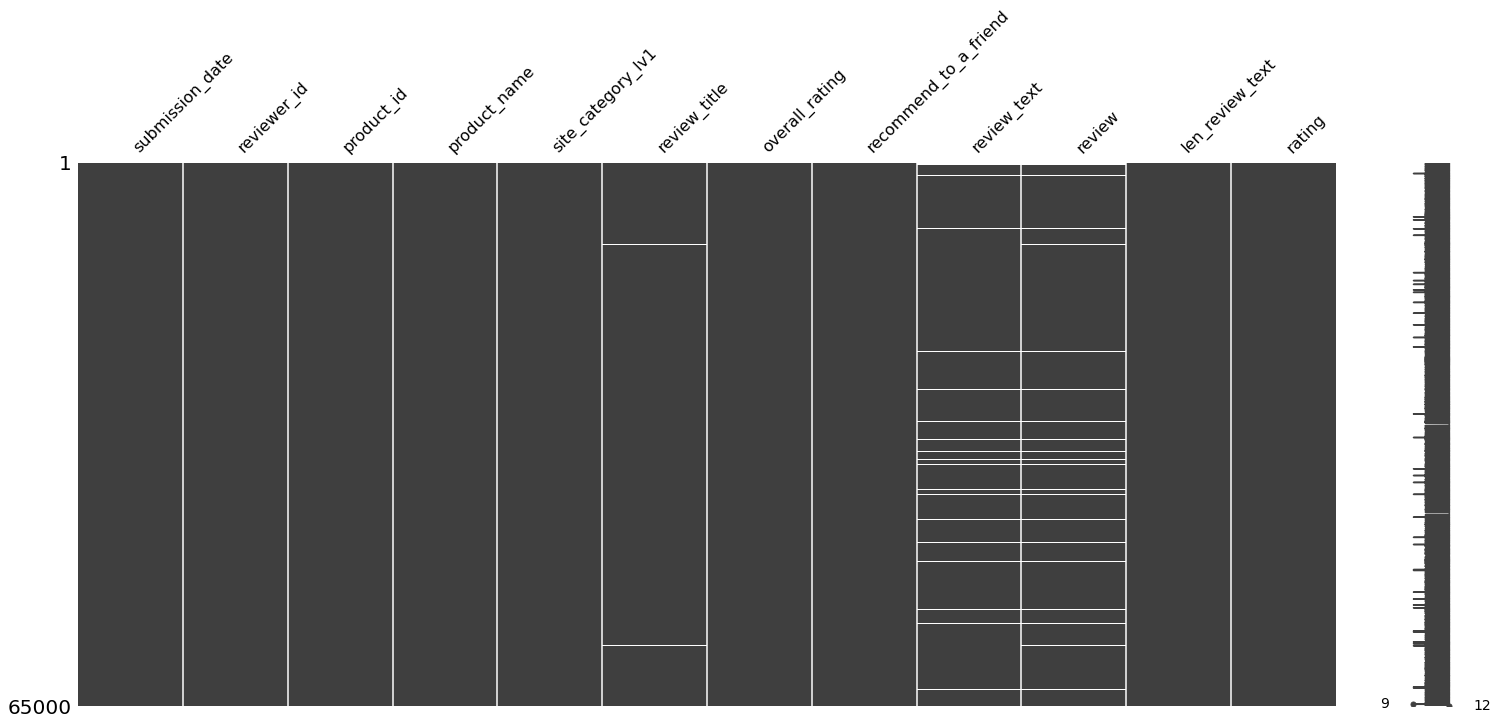

In [26]:
msno.matrix(df.sample(65000))

Como ainda existem valores faltantes, agora iremos retirar as linhas correspondentes

### Excluindo linhas que possuem valores faltantes (em qualquer coluna)

In [27]:
colunas = df.columns
for i in colunas:
  df = df[df[i].notna()]

In [28]:
df['rating'].value_counts() #existe um desbalanceamento aqui

 1    79120
-1    33689
 0    15974
Name: rating, dtype: int64

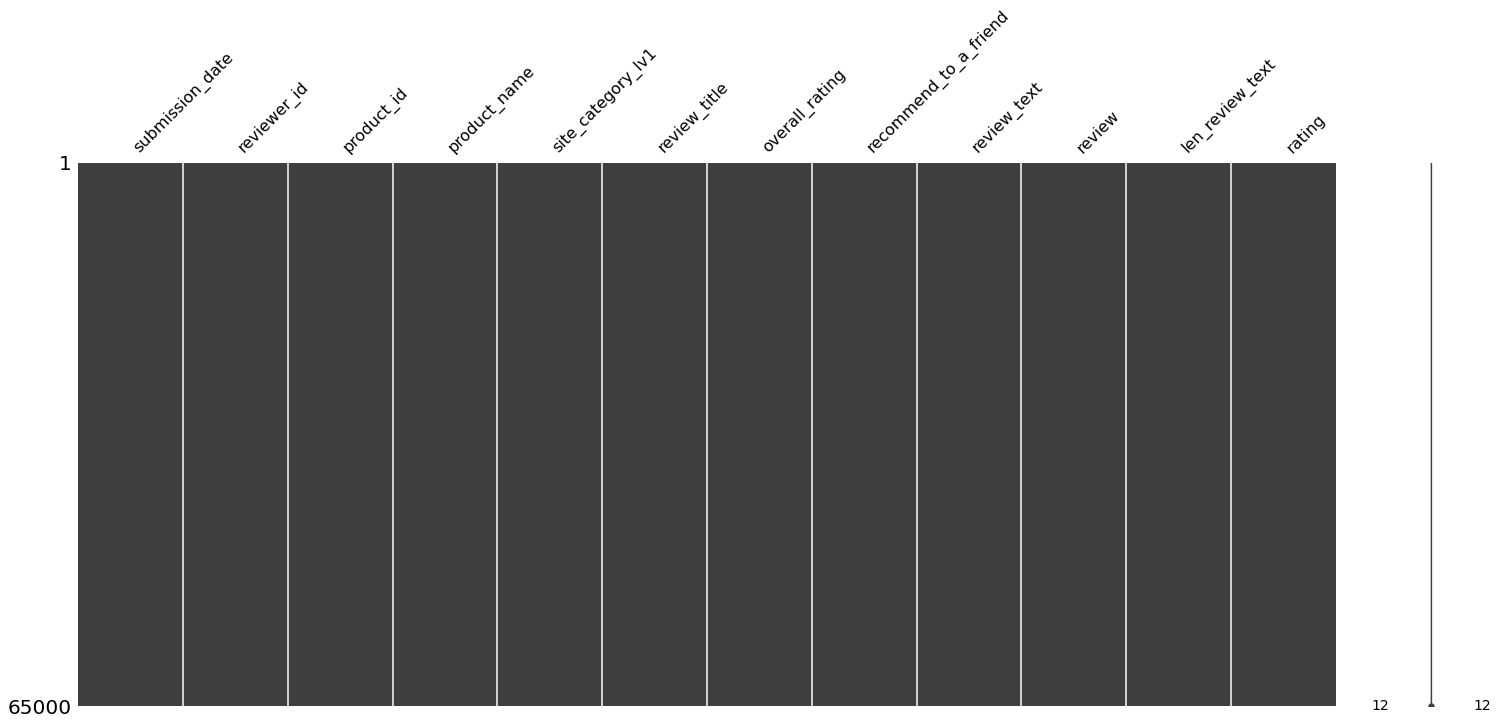

In [29]:
msno.matrix(df.sample(65000))

### Fazendo o Balanceamento dos dados
- Neste caso foi feito o Down-Sample

In [30]:
#g = df.groupby('rating')
#df_down_sample =g.apply(lambda x: x.sample(g.size().min(), random_state=SEED).reset_index(drop=True))
#df_down_sample['rating'].value_counts()


Apenas conferi se realmente estavam balanceados

In [31]:
#count=0
#for i in df_down_sample['rating']:
#  if i ==1:
#    count+=1
#print(count)

### Separando Dataset em Teste (20% geral) e Treino (80% do geral)

In [32]:
#x_train,x_test,y_train,y_test=train_test_split(df_down_sample,df_down_sample['rating'],test_size=0.2)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)

Apenas conferindo a persistência do balanceamento

In [33]:
df_test['rating'].value_counts()

 1    15822
-1     6737
 0     3198
Name: rating, dtype: int64

In [57]:
df_test.to_csv('test.csv', index=False)
df_test[df_test['rating'] != 0].to_csv('test_sa.csv', index=False)

In [35]:
df_train['rating'].value_counts()

 1    63298
-1    26952
 0    12776
Name: rating, dtype: int64

### Dividindo o dataset de treino em Duas partes ( SA e REC)

In [36]:
df_train_SA, df_train_REC = train_test_split(df_train, test_size=0.5, random_state=SEED)

In [37]:
df_train_REC = pd.concat((df_train_SA[df_train_SA['rating'] == 0], df_train_REC))
df_train_SA = df_train_SA[df_train_SA['rating'] != 0]

Confirmando que o balanceamento entre as duas classes permanece

In [38]:
df_train_SA['rating'].value_counts()

 1    31654
-1    13536
Name: rating, dtype: int64

In [39]:
df_train_REC['rating'].value_counts()

 1    31644
-1    13416
 0    12776
Name: rating, dtype: int64

In [40]:
#df2 = df[['reviewer_id','product_id','review_title','review_text','product_name','site_category_lv1', 'overall_rating']]

## Tratamento dos dados para SA

### Seleção das colunas de interesse pra SA

In [41]:
df_train_SA_tmp = df_train_SA#[['review','len_review_text','review_title','review_text', 'overall_rating', 'rating']]

In [42]:
df_train_SA_2, df_dev_SA_2 = train_test_split(df_train_SA_tmp, test_size=0.2, random_state=SEED)

In [43]:
g = df_train_SA_2.groupby('rating')
df_train_SA_balanced = g.apply(lambda x: x.sample(g.size().min(), random_state=SEED))
df_train_SA_balanced = df_train_SA_balanced.droplevel(0)

In [44]:
df_train_REC = pd.concat((df_train_SA_tmp[~df_train_SA_tmp.index.isin(df_train_SA_balanced.index)], df_train_REC))

In [45]:
df_train_SA_balanced.to_csv('train_sa.csv', index=False)
df_dev_SA_2.to_csv('dev_sa.csv', index=False)

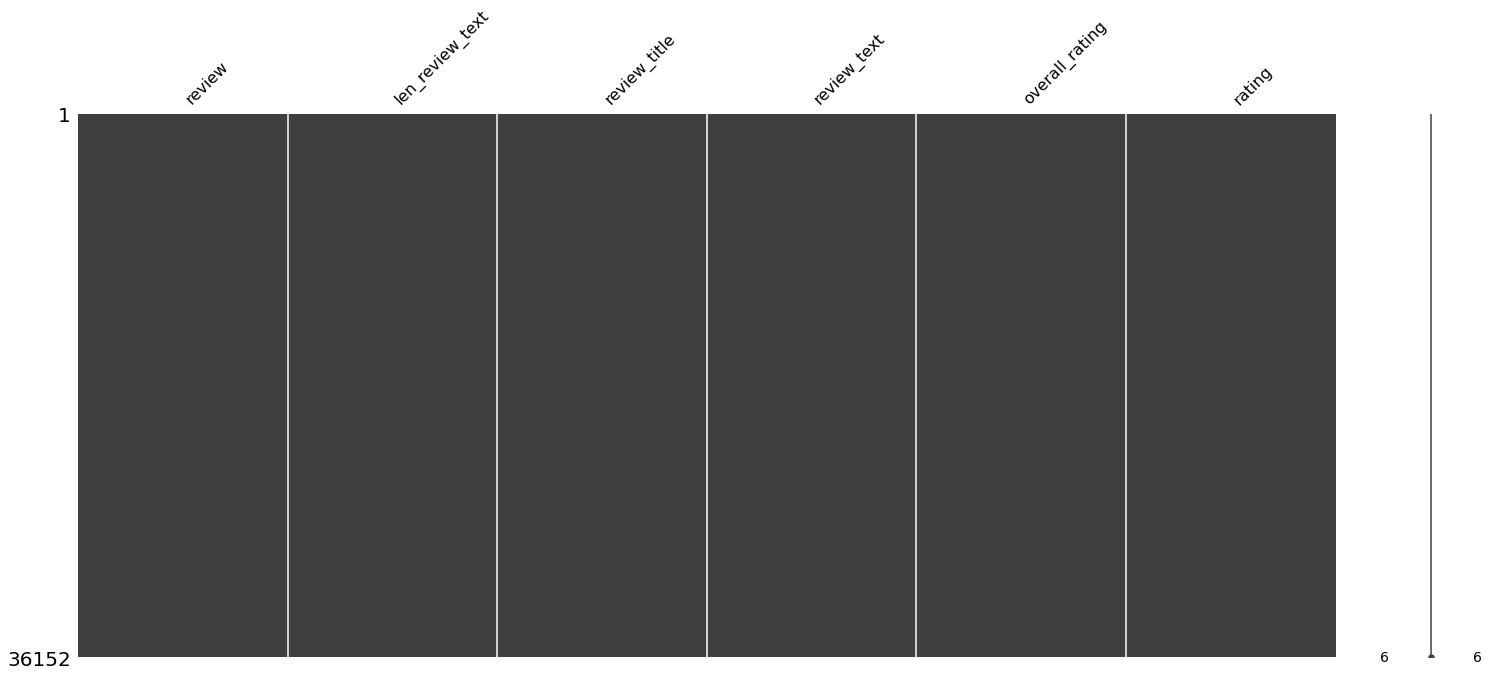

In [46]:
msno.matrix(df_train_SA_2)

### Confirmando o Balanceamento

In [47]:
df_train_SA_balanced['rating'].value_counts()

-1    10854
 1    10854
Name: rating, dtype: int64

In [48]:
df_dev_SA_2['rating'].value_counts()

 1    6356
-1    2682
Name: rating, dtype: int64

In [49]:
df_train_SA_2.describe()

,len_review_text,overall_rating,rating
count,36152.000000,36152.000000,36152.000000
mean,135.575653,3.590064,0.399535
std,121.750191,1.607918,0.916730
min,50.000000,1.000000,-1.000000
25%,67.000000,2.000000,-1.000000
50%,95.000000,4.000000,1.000000
75%,154.000000,5.000000,1.000000
max,2685.000000,5.000000,1.000000


In [50]:
df_train_SA_2

,review,len_review_text,review_title,review_text,overall_rating,rating
11507,não gostei\nInstalei na tv analógica e seu con...,127,não gostei,Instalei na tv analógica e seu conversor e não...,1,-1
100099,Notebook Positivo\nSempre considerei a Positiv...,123,Notebook Positivo,Sempre considerei a Positivo como uma das melh...,4,1
57903,Muito bom\nMuito bom o produto!! Recomendo par...,190,Muito bom,Muito bom o produto!! Recomendo para quem prec...,4,1
131499,"Tv 55\nÓtimo produto quantidade inexplicável,e...",66,Tv 55,"Ótimo produto quantidade inexplicável,entrega ...",5,1
131915,É muita qualidade.\nFoi pra minha irmã na verd...,65,É muita qualidade.,Foi pra minha irmã na verdade. Ela disse que e...,5,1
...,...,...,...,...,...,...
14807,"Amei o produto\nO produto é muito bom, vale su...",144,Amei o produto,"O produto é muito bom, vale super a pena efetu...",5,1
71942,NÃO RECEBI MEU PRODUTO\nVcs mandam e-mail pra ...,151,NÃO RECEBI MEU PRODUTO,Vcs mandam e-mail pra avaliar um produto que j...,1,-1
38118,REINICIA SOZINHO\nTenho um há tres meses e no ...,200,REINICIA SOZINHO,Tenho um há tres meses e no primeiro mes começ...,2,-1
12947,Muito bom\nFaço uso deste produto há alguns me...,68,Muito bom,Faço uso deste produto há alguns meses e não c...,5,1


## Tratamento dos dados para REC

### Seleção das colunas de interesse pra REC

In [51]:
df_train_REC_2 = df_train_REC#[['review','len_review_text','reviewer_id','product_id','review_title','review_text','product_name','site_category_lv1', 'overall_rating', 'rating']]

In [52]:
df_train_REC_2.to_csv('train_rec.csv', index=False)

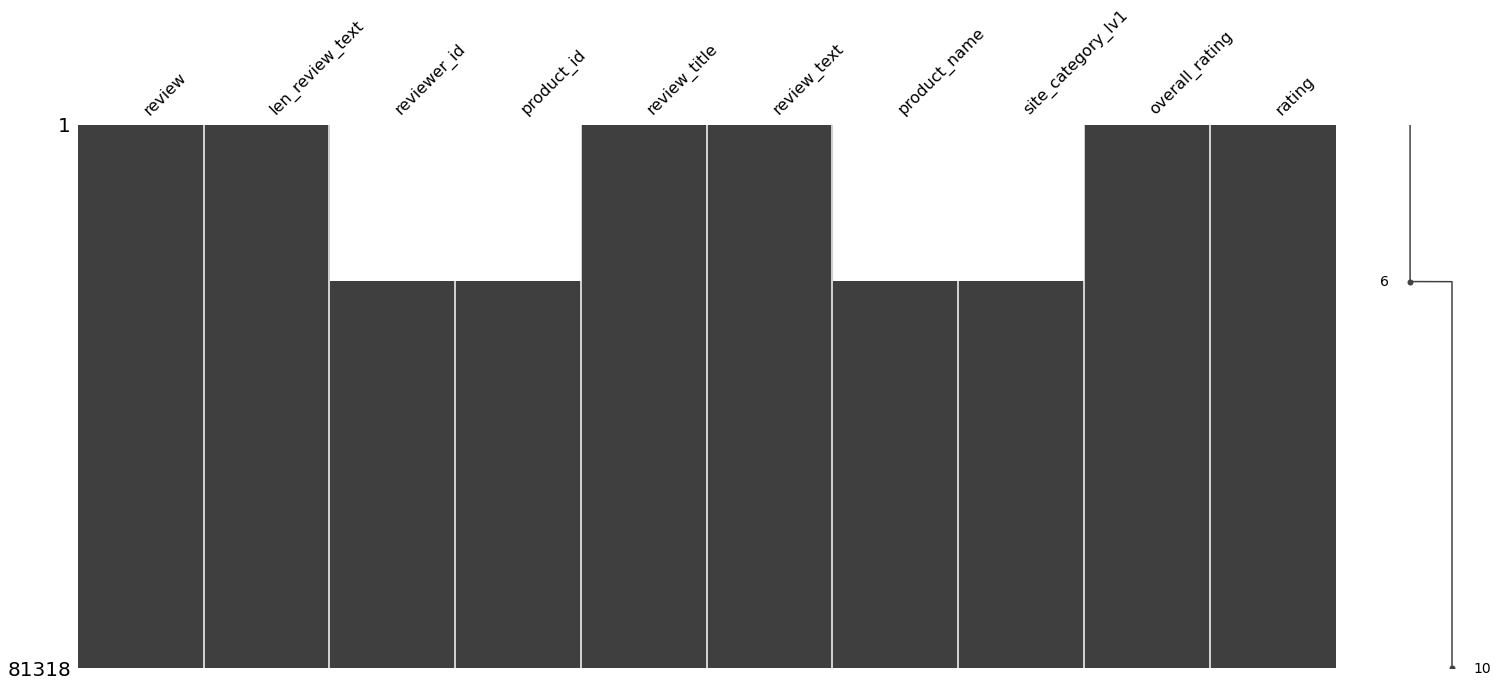

In [53]:
msno.matrix(df_train_REC_2)

### Confirmando o balanceamento

In [54]:
df_train_REC_2['rating'].value_counts()

 1    52444
-1    16098
 0    12776
Name: rating, dtype: int64

In [55]:
df_train_REC_2.describe()

,len_review_text,overall_rating,rating
count,81318.000000,81318.000000,81318.000000
mean,132.919858,3.681854,0.446961
std,123.926859,1.409441,0.801949
min,50.000000,1.000000,-1.000000
25%,67.000000,3.000000,0.000000
50%,93.000000,4.000000,1.000000
75%,150.000000,5.000000,1.000000
max,4548.000000,5.000000,1.000000


In [56]:
df_train_REC_2

,review,len_review_text,reviewer_id,product_id,review_title,review_text,product_name,site_category_lv1,overall_rating,rating
12813,Pedido realizado em dezembro ainda não foi ent...,60,NaN,NaN,Pedido realizado em dezembro ainda não foi ent...,Pedido realizado é pago em dezembro e ainda nã...,NaN,NaN,1,-1
110387,"Gostei muito\nÉ um produto muito bom, deixou m...",68,NaN,NaN,Gostei muito,"É um produto muito bom, deixou meu cabelo liso...",NaN,NaN,5,1
67269,Ótimo smartphone. Recomendo!\nFunções que sati...,71,NaN,NaN,Ótimo smartphone. Recomendo!,Funções que satisfaz as necessidades que eu pr...,NaN,NaN,4,1
103932,Produto não funciona\nQue decepção!!!!! Tenho ...,349,NaN,NaN,Produto não funciona,Que decepção!!!!! Tenho costume de usar o Ange...,NaN,NaN,1,-1
105495,VENDA EXCLUSIVA NO SALÃO DE BELEZA\nEm virtude...,290,NaN,NaN,VENDA EXCLUSIVA NO SALÃO DE BELEZA,Em virtude da necessidade de avaliação capilar...,NaN,NaN,5,1
...,...,...,...,...,...,...,...,...,...,...
117451,Produto excelente!\nAdorei .Tive um probleminh...,165,933f18e90a9b6226d76cb3177f7893bdb129b87b88d490...,7404831,Produto excelente!,Adorei .Tive um probleminha cm a entrega do pr...,Mesa para Telefone Bis Imbuia/Preto - Artely,Móveis,5,1
53669,Ótimo notebook\nÓtimo notebook para realizar t...,161,99472da36c674404345e26847d87b814787bed3c7062ba...,132116769,Ótimo notebook,Ótimo notebook para realizar tarefas diárias: ...,Notebook Dell Inspiron i15-5566-D10P Intel Cor...,Informática,5,1
102033,Dois dias de uso quebrou o botão aonde liga e ...,140,b838d59fdeb2abdf0d035e1b8ef5c64dc3a2e2d983bb0a...,132647720,Dois dias de uso quebrou o botão aonde liga e ...,Dois dias de uso quebrou o botão de liga e des...,Aspirador de Pó Philco Rapid1100 Turbo 2 em 1 ...,Eletroportáteis,1,-1
77288,"Tripé\nExcelente tripé, veio com uma bolsa apr...",160,c6cc9ce2f3acb3da8f573512607654a2ad200fdac9ede5...,115643284,Tripé,"Excelente tripé, veio com uma bolsa apropriada...",Tripé Amador Greika WT3750 -WF,Câmeras e Filmadoras,5,1


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
!mkdir /content/drive/MyDrive/b2w-processed-dataset/
!cp *.csv /content/drive/MyDrive/b2w-processed-dataset/